In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# # This is required in order to load the development and test images into Google Colab
# !unzip "/content/drive/MyDrive/ENEL-Group/Final Project/Project Files/Train.zip" -d "/content"
# !unzip "/content/drive/MyDrive/ENEL-Group/Final Project/Project Files/TrainEnhanced.zip" -d "/content"
# !unzip "/content/drive/MyDrive/ENEL-Group/Final Project/Project Files/Test.zip" -d "/content"

# ENEL 645 Project - Traffic Sign Recognition Image Classification



In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from skimage import transform
from skimage import exposure
from skimage import io
from PIL import Image, ImageEnhance
from sklearn import metrics


import os

np.random.seed(42)

In [4]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [5]:
# Uncomment if running with local GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

The GTSRB dataset consists of images belonging to 43 different classes. The class mapping to their corresponding integer value is performed below.

In [6]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

# setting the number of classes
num_classes = len(classes)

## 1. Loading GTSRB dataset into notebook


### Function definitions for enhancing the contrast of the training dataset and saving

In [7]:
# def create_enhanced_images(enhanced_train_directory_name = 'TrainEnhanced'):
#     original_train_directory_path = '/content/Train'
#     enhanced_train_directory_path = '/content/' + enhanced_train_directory_name

#     # loop through each class integer values
#     for i in range(num_classes):
#         # retrieves the path for photos belonging to the same class
#         class_path = os.path.join(original_train_directory_path, str(i))
#         image_name_list = os.listdir(class_path)

#         # iterates through each image file names
#         for image_name in image_name_list:

#             try:
#                 # create image path
#                 image_path = class_path + '/' + image_name

#                 image = Image.open(image_path)

#                 # convert image into a numpy array
#                 image = np.array(image)

#                 # applying selected enhancements on image
#                 #   enhancer = ImageEnhance.Contrast(image)
#                 #   image = enhancer.enhance(2.0)
#                 image = exposure.equalize_adapthist(image, clip_limit=0.1)

#                 class_path_enhanced = os.path.join('/content/TrainEnhanced', str(i))
#                 image_path_enhanced = class_path_enhanced + '/' + image_name

#                 # Check if directory exists, else create it
#                 if not os.path.exists(class_path_enhanced):
#                     os.makedirs(class_path_enhanced)

#                 im = Image.fromarray((image * 255).astype(np.uint8), mode='RGB')
#                 im.save(image_path_enhanced)

#                 # store image as numpy array into data list with the respective label class
#                 print('Finished loading:', image_path)

#             except Exception as e:
#                 print('Error loading train image: ', e)


In [8]:
# # Enhance train images and save to TrainEnhanced directory (ONLY UNCOMMENT IF YOU WOULD LIKE TO APPLY ENHANCEMENTS - LONG PROCESSING TIME)
# create_enhanced_images('TrainEnhanced')

# # Zips enhanced train image folder and saves locally
# # from google.colab import files
# !zip -r /content/TrainEnhanced.zip /content/TrainEnhanced
# files.download("/content/TrainEnhanced.zip")

### Function definitions for loading development and test datasets into notebook


In [9]:
# function to load the GTSRB development dataset
def load_development_dataset(train_directory_name='Train'):
  X_dev = []
  Y_dev = []

#   cur_path = '/content/' + train_directory_name
  cur_path = './content/' + train_directory_name # Uncomment for local path
#   cur_path = os.path.join(dirname,'content', train_directory_name) # Uncomment for local path (windows)


  # loop through each class integer values
  for i in range(num_classes):
    # retrieves the path for photos belonging to the same class
    class_path = os.path.join(cur_path, str(i))
#     class_path = cur_path + '/' + str(i)
    print(class_path)
    image_name_list = os.listdir(class_path)


    # iterates through each image file names
    for image_name in image_name_list:

      try:
        # create image path
        image_path = class_path + '/' + image_name
#         image_path = os.path.join(class_path, image_name)
        
        # open and resize the image to 32x32 pixels
        image = Image.open(image_path)
        image = image.resize((32,32))

        # convert image into a numpy array
        image = np.array(image)

        # store image as numpy array into data list with the respective label class
        X_dev.append(image)
        Y_dev.append(i)
#         print('Finished loading:', image_path)

      except Exception as e:
        print('Error loading train image')
        print(e)
    
  # convert development dataset into numpy array
  X_dev = np.array(X_dev)
  Y_dev = np.array(Y_dev)

  return X_dev, Y_dev

In [10]:
# function to load the GTSRB test dataset
# def load_test_dataset(filepath='/content/drive/MyDrive/ENEL-Group/Final Project/Project Files/Test.csv', enhance_contrast=False):
def load_test_dataset(filepath='./content/Test.csv', enhance_contrast=False): # Uncomment if running locally
# def load_test_dataset(filepath= dirname + '\\content\\Test.csv', enhance_contrast=False): # Uncomment if running locally
  test_df = pd.read_csv(filepath)
  test_paths = test_df['Path']

  X_test = []
  Y_test = np.array(test_df['ClassId'])

#   cur_path = "/content/"
  cur_path = "./content/"
#   cur_path = os.path.join(dirname, "\\content\\") # Uncomment if running locally


  for path in test_paths:
    try:
      # Create and store image path
      image_path = cur_path + path

      # Open and resize image using PIL library
      image = Image.open(image_path)
      image = image.resize((32,32))
      
      # Convert image to a numpy array
      image = np.array(image)

      if enhance_contrast:
          # Apply contrast enhancement
#           image = exposure.equalize_adapthist(image, clip_limit=0.1)
          image = exposure.equalize_adapthist(image, clip_limit=0.03)

          # Store image as numpy array into data list with the respective label class
          X_test.append( (image * 255).astype(np.uint8) )
      else:
          X_test.append(image)
   
#       print('Finished loading:', image_path)

    except:
      print("Error")

  # Convert X_test to a numpy array
  X_test = np.array(X_test)
  
  return X_test, Y_test

### Loading GTSRB development and test datasets

In [11]:
X_dev_ori, Y_dev_ori = load_development_dataset() # load original train images
X_dev, Y_dev = load_development_dataset('TrainEnhanced') # load enhanced train images
X_test_ori, Y_test_ori = load_test_dataset() # load test images with no enhancements
X_test, Y_test = load_test_dataset(enhance_contrast=True) # load test images with enhancements

./content/Train/0
./content/Train/1
./content/Train/2
./content/Train/3
./content/Train/4
./content/Train/5
./content/Train/6
./content/Train/7
./content/Train/8
./content/Train/9
./content/Train/10
./content/Train/11
./content/Train/12
./content/Train/13
./content/Train/14
./content/Train/15
./content/Train/16
./content/Train/17
./content/Train/18
./content/Train/19
./content/Train/20
./content/Train/21
./content/Train/22
./content/Train/23
./content/Train/24
./content/Train/25
./content/Train/26
./content/Train/27
./content/Train/28
./content/Train/29
./content/Train/30
./content/Train/31
./content/Train/32
./content/Train/33
./content/Train/34
./content/Train/35
./content/Train/36
./content/Train/37
./content/Train/38
./content/Train/39
./content/Train/40
./content/Train/41
./content/Train/42
./content/TrainEnhanced/0
./content/TrainEnhanced/1
Error loading train image
[Errno 21] Is a directory: './content/TrainEnhanced/1/.ipynb_checkpoints'
./content/TrainEnhanced/2
./content/Train

In [12]:
print('Development Dataset:')
print('Dev Samples:', X_dev_ori.shape)
print('Dev Labels:', Y_dev_ori.shape)
print()
print('Test Dataset:')
print('Test Samples:', X_test.shape)
print('Test Labels:', Y_test.shape)

Development Dataset:
Dev Samples: (39209, 32, 32, 3)
Dev Labels: (39209,)

Test Dataset:
Test Samples: (12630, 32, 32, 3)
Test Labels: (12630,)


After loading the GTSRB development and test datasets into the notebook we analyzed the number of sample in each grouping.

There are 39209 samples in the development dataset and 12630 samples in the test dataset. Each of the samples have been resized to the dimensions of 32x32 while still keeping the RGB color information resulting in 3 channels.

## 2. Exploring the GTSRB datasets
 

Here is a distribution of the development dataset displaying the number of samples in each class.

In [13]:
# get the number of samples in each class
unique, counts = np.unique(Y_dev, return_counts=True)
label_names = []

# get a list of the label names corresponding with the integer value
for i in range(num_classes):
  label_names.append(classes[i])

In [14]:
# Plotting the number of images in each class
# plt.figure(figsize=(10,5))  
# plt.bar(label_names, counts)
# plt.xticks(label_names, rotation='vertical')
# plt.xlabel('Classes')
# plt.ylabel('Class Frequency')
# plt.title('GTSRB Development Dataset Class Distribution')
# plt.show()

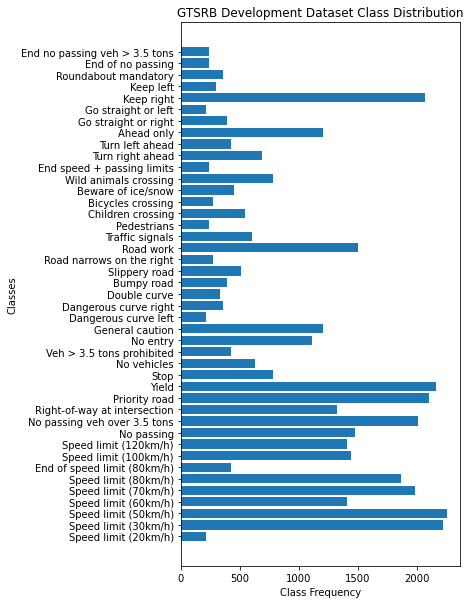

In [15]:
# Plotting the number of images in each class
plt.figure(figsize=(5,10))  
plt.barh(label_names, counts)
plt.xlabel('Class Frequency')
plt.ylabel('Classes')
plt.title('GTSRB Development Dataset Class Distribution')
plt.show()

From the distribution of the development dataset, we determined that there is a class imbalance between the number of samples for each class. Because of this imbalance we will have to apply stratification in order to keep the frequencies the same when splitting the development dataset into training and validation sets.

Comparing the original images with the enhanced images.

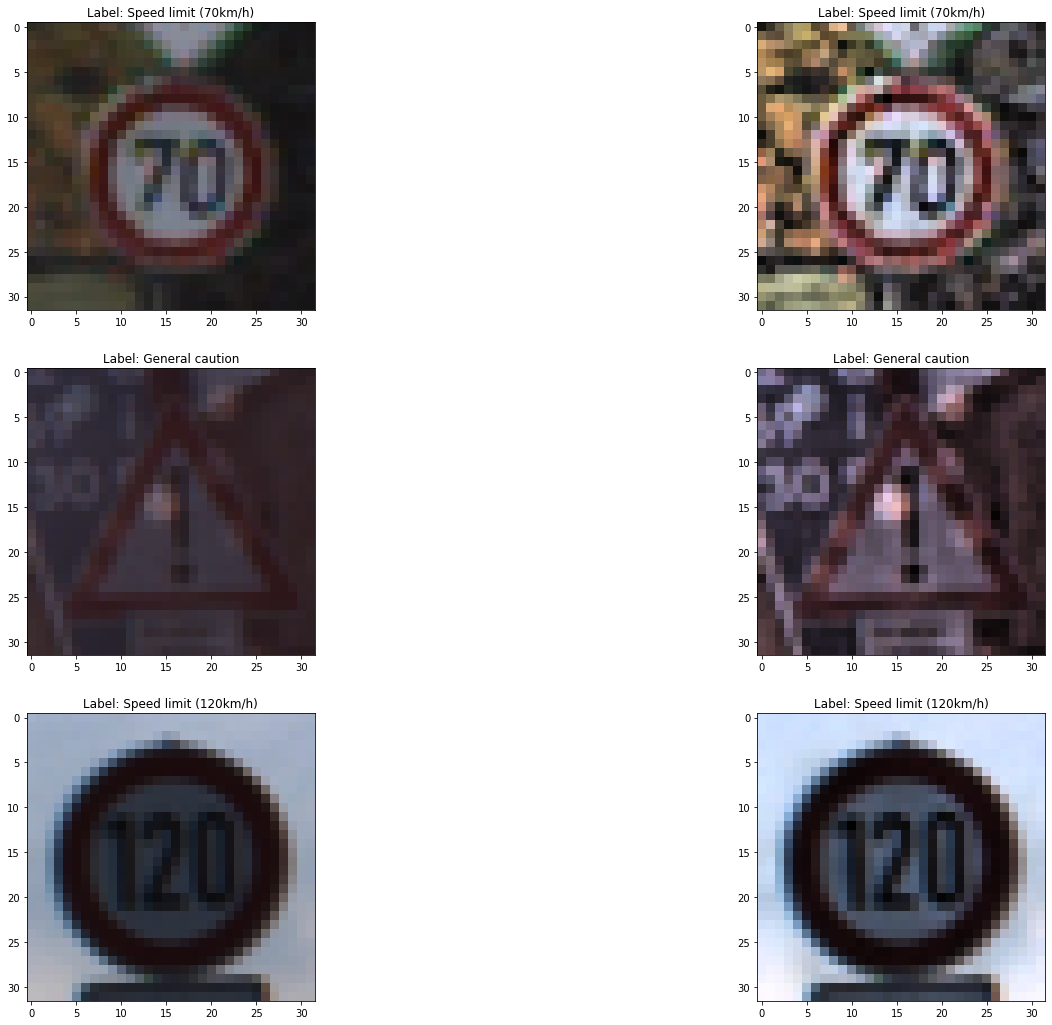

In [16]:
# showing contrast enhancement on three samples
sample_indexes = [7779, 25656, 12528]
plt.figure(figsize = (24,18))

for (ii, jj) in enumerate(sample_indexes):
  plt.subplot(3,2,(ii)*2+1)
  plt.imshow(X_dev_ori[jj])
  plt.title("Label: %s" %classes[Y_dev_ori[jj]])
  plt.subplot(3,2,(ii)*2+2)
  plt.imshow(X_dev[jj])
  plt.title("Label: %s" %classes[Y_dev[jj]])
plt.show()

Display random image samples from development set.

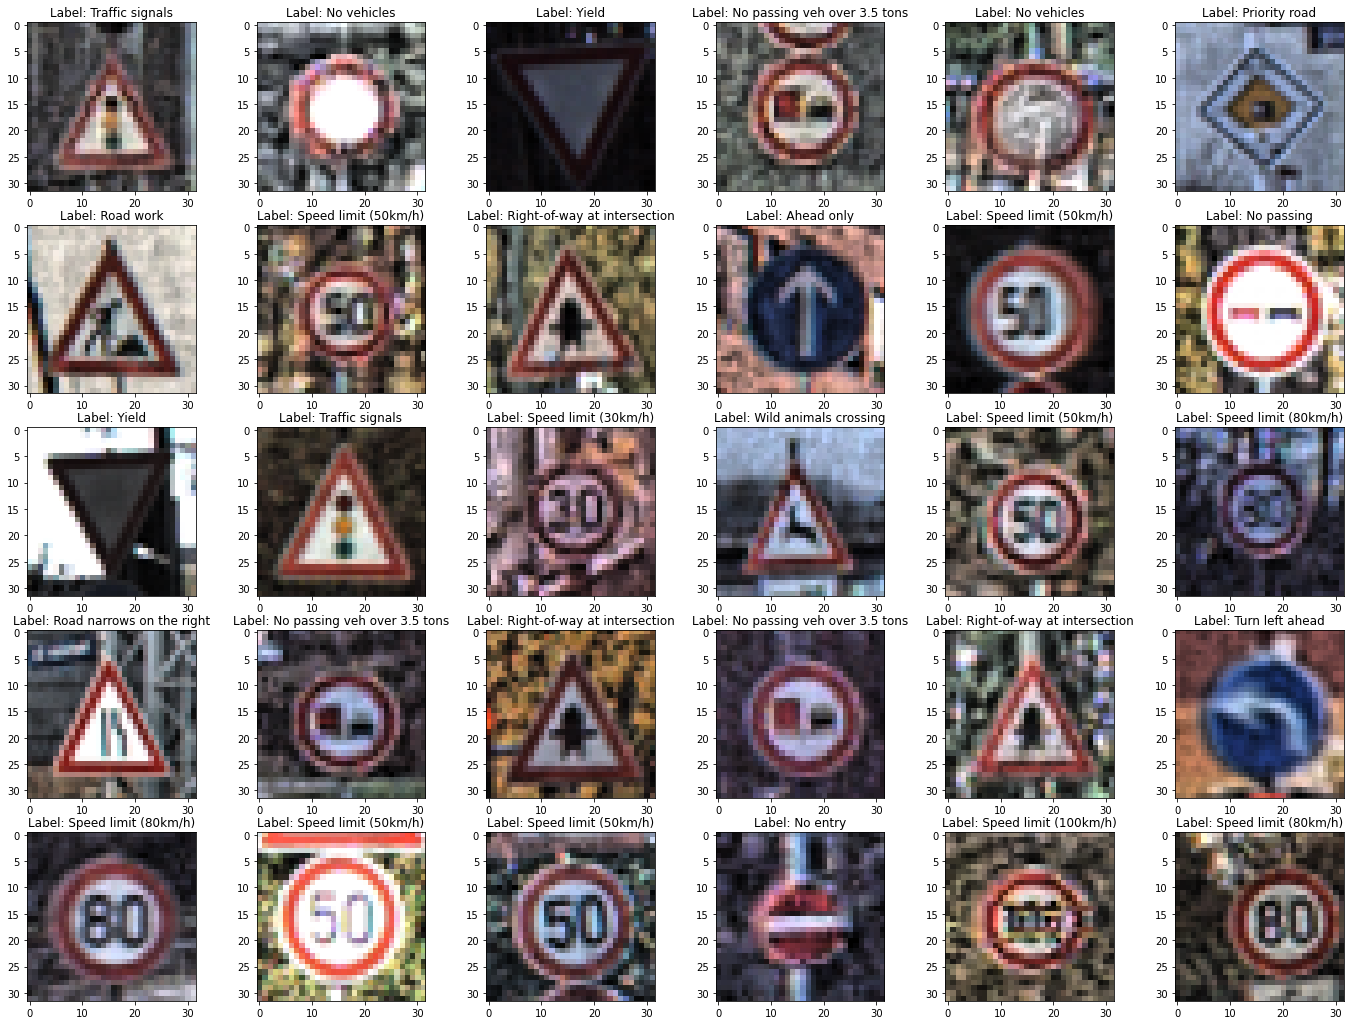

In [17]:
# display 30 random samples from the development dataset
sample_indexes = np.random.choice(np.arange(X_dev.shape[0], dtype = int), size = 30, replace = False)
plt.figure(figsize = (24,18))

for (ii, jj) in enumerate(sample_indexes):
  plt.subplot(5,6,ii+1)
  plt.imshow(X_dev[jj])
  plt.title("Label: %s" % classes[Y_dev[jj]])
plt.show()

## 3. Split data into train and validation sets


After analyzing the dataset that we are working with, the next step is to split the development dataset into training and validation sets. Here we are using the sklearn train_test_split function to split our development set into 75% training and 25% validation. Furthermore, we have enabled shuffling to randomize the sample prior to splitting and applying stratification to keep the frequency distribution the same between the two sets.

In [18]:
# X_train, X_val, Y_train, Y_val = train_test_split(X_dev, Y_dev, test_size=0.25, random_state=42, shuffle=True, stratify=Y_dev)
X_train, X_val, Y_train, Y_val = train_test_split(X_dev_ori, Y_dev_ori, test_size=0.25, random_state=42, shuffle=True, stratify=Y_dev_ori)

print('Training samples:', X_train.shape)
print('Training labels:', Y_train.shape)
print('Validation samples:', X_val.shape)
print('Validation labels:', Y_val.shape)

Training samples: (29406, 32, 32, 3)
Training labels: (29406,)
Validation samples: (9803, 32, 32, 3)
Validation labels: (9803,)


## 4. One Hot Encode Labels

Once the dataset has been split into training, validation, and test sets, the step is to one hot encode the labels. Since the labels in this image classification problem are not ordinal, we must transform the categorical representation of the label into a numerical value that the machine learning algorithm can understand.

In [19]:
# One hot encode the training, validation, and test set labels
Y_train_oh = tf.keras.utils.to_categorical(Y_train)
Y_val_oh = tf.keras.utils.to_categorical(Y_val)
# Y_test_oh = tf.keras.utils.to_categorical(Y_test)
Y_test_oh = tf.keras.utils.to_categorical(Y_test_ori)


# Display the first 5 labels for each sample set
print('Train Set')
print('Train Labels:')
print(Y_train[:5])
print()
print('Train One hot encoded labels:')
print(Y_train_oh[:5])
print()

print('Validation Set')
print('Validation Labels:')
print(Y_val[:5])
print()
print('Validation One hot encoded labels:')
print(Y_val_oh[:5])
print()

print('Test Set')
print('Test Labels:')
# print(Y_test[:5])
print(Y_test_ori[:5])
print()
print('Test One hot encoded labels:')
print(Y_test_oh[:5])
print()

Train Set
Train Labels:
[36 13 36 10  1]

Train One hot encoded labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Validation Set
Validation Labels:
[ 2 38 37 12  4]

Validation One hot encoded labels:
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

## 5. Scaling and Normalization

In [20]:
normalization_type = -1 # no scaling and normalization will be done since we will use preprocess_input() from Keras API for VGG-16

if normalization_type == 0:
  X_train_norm = X_train/255
  X_val_norm = X_val/255
  X_test_norm = X_test_ori/255
#   X_test_norm = X_test/255

elif normalization_type == 1:
  train_mean = X_train.mean()
  train_std = X_train.std()

  X_train_norm = (X_train - train_mean)/train_std
  X_val_norm = (X_val - train_mean)/train_std
  X_test_norm = (X_test_ori - train_mean)/train_std
#   X_test_norm = (X_test - train_mean)/train_std
else:
  X_train_norm = X_train
  X_val_norm = X_val
  X_test_norm = X_test_ori
#   X_test_norm = X_test

## 6. Define Model Callbacks

In [55]:
model_name = "team_30_GTSRB_vgg16_transfer_learning.h5"

# Early stop callback set at 20 epochs
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20) # previously 5 or 10

# Monitor callback for saving the model only
monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%10 == 0 and epoch != 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

## 7. Determine Data Augmentation Parameters

We experimented with different augmnentation parameters, and these parameters yields the best results:
<ul>
<li>rotation_range: 5 degrees</li>
<li>width-shift-range: 0.1 </li>
<li>height-shift-range: 0.1 </li>
<li>shear-range: 0.1 </li>
<li>horizontal-flip: True </li>
<li>zoom-range: 0.1 </li>
<li>fill-mode: constant </li>
<li>cval: 0</li>
</ul>

In [22]:
# Applies Contrast limited adaptive histogram equalization to enhance image 
def CLAHE(img):
    img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
    return img_adapteq

In [23]:
# Applying data augmentation methods to improve training
batch_size = 32

gen_params = {"featurewise_center":False,"samplewise_center":False,"featurewise_std_normalization":False,\
              "samplewise_std_normalization":False,"zca_whitening":False,"rotation_range":5,"width_shift_range":0.1,"height_shift_range":0.1,\
              "shear_range":0.1, "zoom_range":0.1,"horizontal_flip":False,"fill_mode":'constant',\
               "cval": 0} # no CLAHE applied

# preprocess_input() is the original preprocessing done for the keras vgg16 model
train_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(**gen_params, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

train_gen.fit(X_train_norm, seed=42)
val_gen.fit(X_val_norm, seed=42)

train_flow = train_gen.flow(X_train_norm, Y_train_oh, batch_size=batch_size,seed=42)
val_flow = val_gen.flow(X_val_norm, Y_val_oh, batch_size=batch_size,seed=42)

-40.126163 68.93631
-123.68 151.061


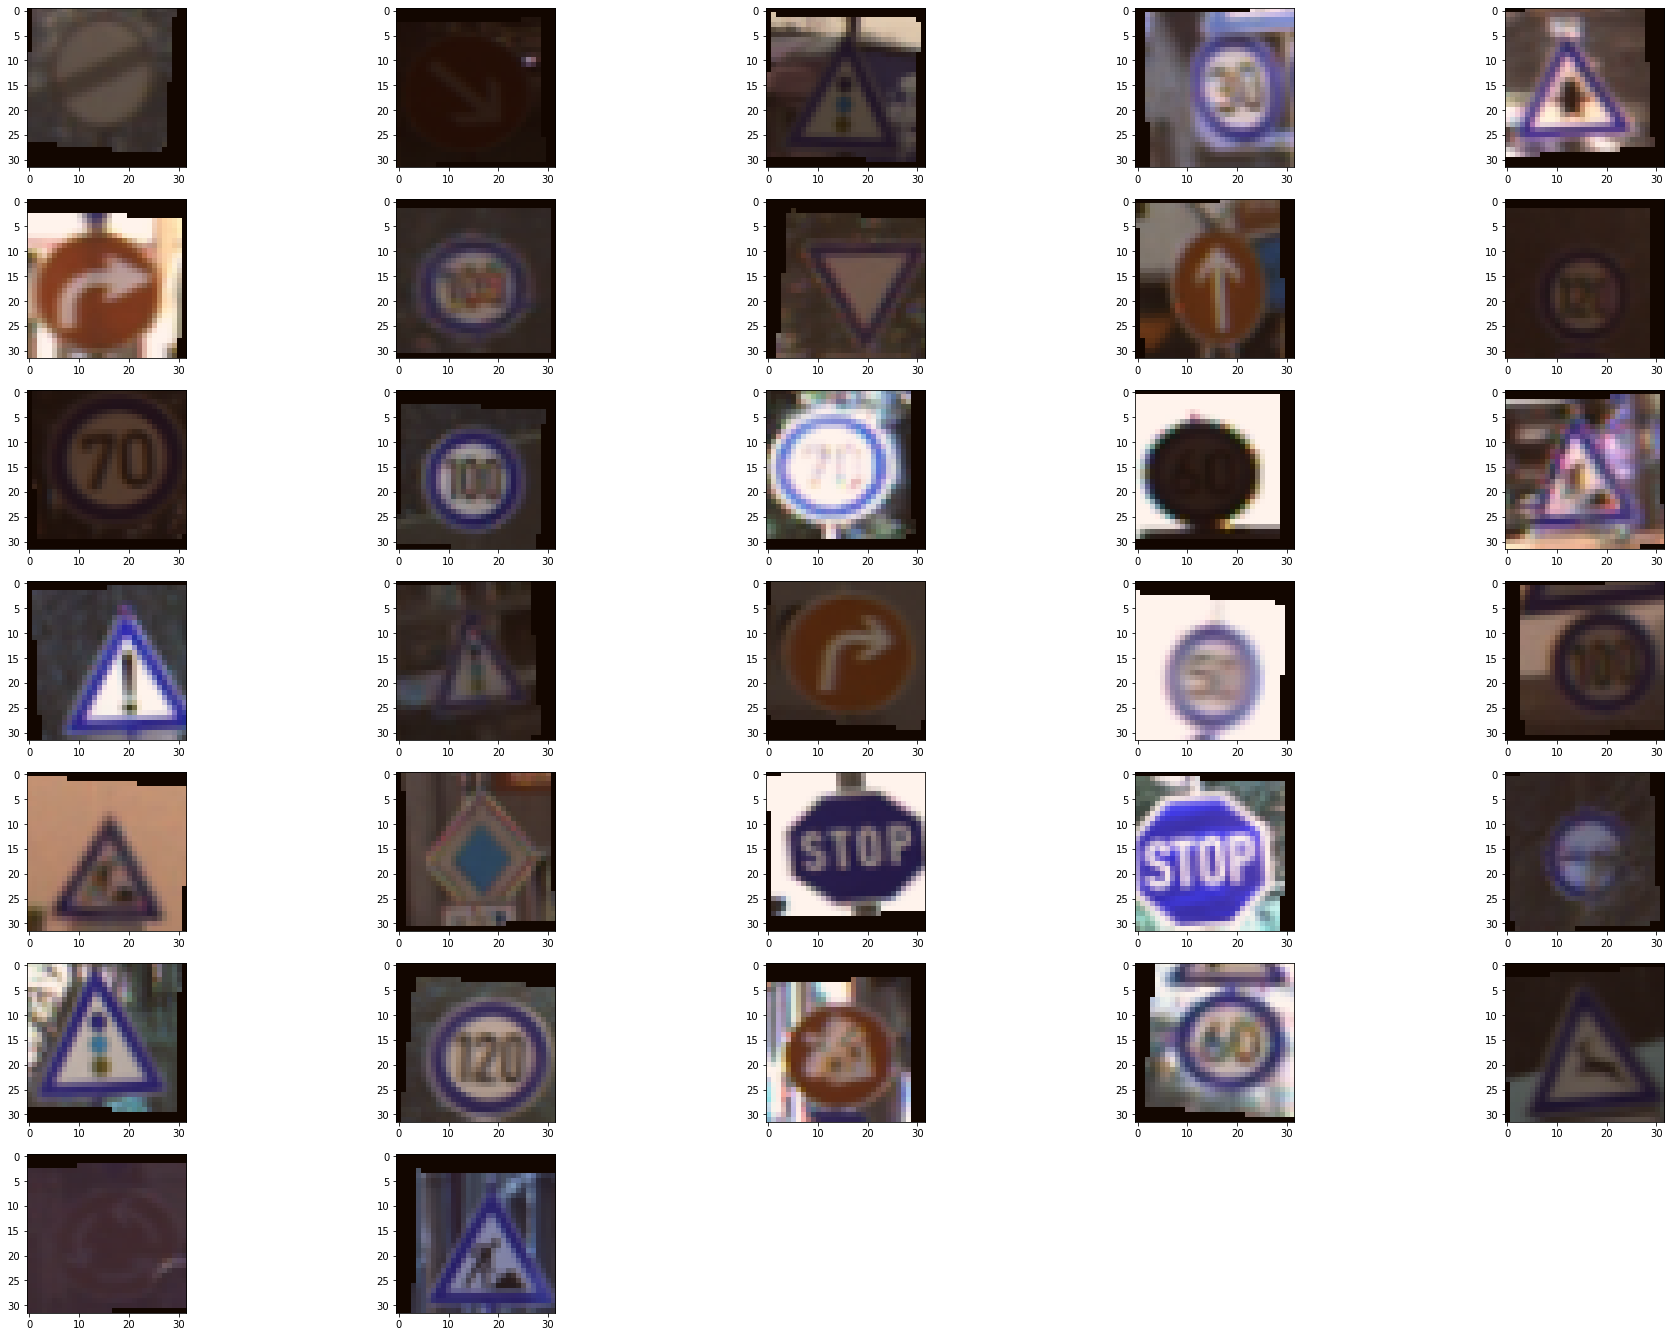

In [24]:
plt.figure(figsize = (32,24))
Xbatch,Ybatch = train_flow.__getitem__(0)
print(Xbatch.mean(),Xbatch.std())
print(Xbatch.min(),Xbatch.max())
for ii in range(batch_size):
    plt.subplot(7,5,ii+1)
    plt.imshow((Xbatch[ii]- Xbatch[ii].min())/(Xbatch.max() - Xbatch[ii].min()), cmap = "gray")
plt.show()

## 9. Evaluate model using test dataset

## 10. Transfer Learning

In [25]:
def create_model_vgg16_imagenet(num_classes, ishape=(32,32,3), lr=1e-4, trainable=False):
    # Freeze the layers of a pretrained VGG16 model on ImageNet
    base_model = tf.keras.applications.VGG16(
        weights="imagenet",
        input_shape=ishape,
        include_top=False,
    )
    base_model.trainable = trainable

    # Add a top
#     x1 = base_model(base_model.input, training=False) # using base_model.input instead of input_image
    x1 = base_model.output
    x2 = tf.keras.layers.Flatten()(x1)
    x3 = tf.keras.layers.Dense(4096, activation='relu')(x2)
    x4 = tf.keras.layers.BatchNormalization()(x3)
    x5 = tf.keras.layers.Dense(4096, activation='relu')(x4)
    x6 = tf.keras.layers.BatchNormalization()(x5)
    out = tf.keras.layers.Dense(num_classes, activation='softmax')(x6)
    model = tf.keras.Model(inputs=base_model.input, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [26]:
model_vgg16_imagenet = create_model_vgg16_imagenet(num_classes, lr=0.0001, trainable=False)
print(model_vgg16_imagenet.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [27]:
# Train model
result_vgg16_imagenet = model_vgg16_imagenet.fit(train_flow, batch_size=64, epochs=100, verbose=1, callbacks=[early_stop, monitor, lr_schedule], validation_data=(val_flow))

Epoch 1/100
919/919 [==============================] - 26s 28ms/step - loss: 1.5401 - accuracy: 0.5676 - val_loss: 1.0480 - val_accuracy: 0.6745 - lr: 1.0000e-04
Epoch 2/100
919/919 [==============================] - 16s 17ms/step - loss: 0.9789 - accuracy: 0.6901 - val_loss: 0.8732 - val_accuracy: 0.7227 - lr: 1.0000e-04
Epoch 3/100
919/919 [==============================] - 15s 17ms/step - loss: 0.8314 - accuracy: 0.7342 - val_loss: 0.7587 - val_accuracy: 0.7563 - lr: 1.0000e-04
Epoch 4/100
919/919 [==============================] - 15s 17ms/step - loss: 0.7456 - accuracy: 0.7588 - val_loss: 0.6924 - val_accuracy: 0.7794 - lr: 1.0000e-04
Epoch 5/100
919/919 [==============================] - 16s 17ms/step - loss: 0.6831 - accuracy: 0.7759 - val_loss: 0.6756 - val_accuracy: 0.7819 - lr: 1.0000e-04
Epoch 6/100
919/919 [==============================] - 16s 17ms/step - loss: 0.6215 - accuracy: 0.7948 - val_loss: 0.6041 - val_accuracy: 0.8022 - lr: 1.0000e-04
Epoch 7/100
919/919 [=======

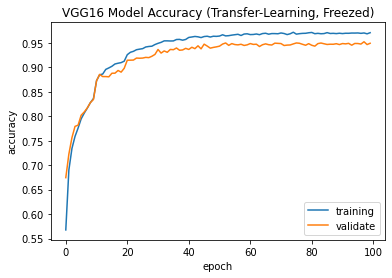

In [28]:
# Plot training and validation accuracy
plt.plot(result_vgg16_imagenet.history['accuracy'])
plt.plot(result_vgg16_imagenet.history['val_accuracy'])
plt.title('VGG16 Model Accuracy (Transfer-Learning, Freezed)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["training","validate"])

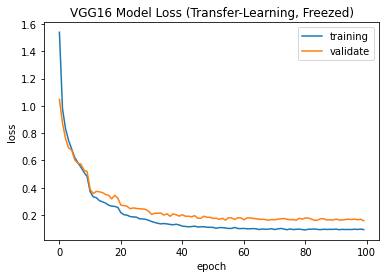

In [29]:
# Plot training and validation loss
plt.plot(result_vgg16_imagenet.history['loss'])
plt.plot(result_vgg16_imagenet.history['val_loss'])
plt.title('VGG16 Model Loss (Transfer-Learning, Freezed)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["training","validate"])

In [33]:
# Create model that is trainable with a smaller learning rate
model_vgg16_imagenet_trainable = create_model_vgg16_imagenet(num_classes, lr=0.0001, trainable=True)

# Load weights
model_vgg16_imagenet_trainable.load_weights("team_30_GTSRB_vgg16_transfer_learning.h5")

In [34]:
# Train model
result_vgg16_imagenet_trainable = model_vgg16_imagenet_trainable.fit(train_flow, batch_size=64, epochs=100, verbose=1, callbacks=[early_stop, monitor, lr_schedule], validation_data=(val_flow))

Epoch 1/100
919/919 [==============================] - 39s 43ms/step - loss: 0.8244 - accuracy: 0.7485 - val_loss: 0.4206 - val_accuracy: 0.8647 - lr: 1.0000e-04
Epoch 2/100
919/919 [==============================] - 34s 37ms/step - loss: 0.1503 - accuracy: 0.9524 - val_loss: 0.4839 - val_accuracy: 0.8782 - lr: 1.0000e-04
Epoch 3/100
919/919 [==============================] - 35s 38ms/step - loss: 0.0909 - accuracy: 0.9718 - val_loss: 0.1224 - val_accuracy: 0.9626 - lr: 1.0000e-04
Epoch 4/100
919/919 [==============================] - 34s 38ms/step - loss: 0.0688 - accuracy: 0.9794 - val_loss: 0.2920 - val_accuracy: 0.9171 - lr: 1.0000e-04
Epoch 5/100
919/919 [==============================] - 35s 38ms/step - loss: 0.0726 - accuracy: 0.9805 - val_loss: 0.1035 - val_accuracy: 0.9739 - lr: 1.0000e-04
Epoch 6/100
919/919 [==============================] - 35s 38ms/step - loss: 0.0609 - accuracy: 0.9839 - val_loss: 0.0744 - val_accuracy: 0.9791 - lr: 1.0000e-04
Epoch 7/100
919/919 [=======

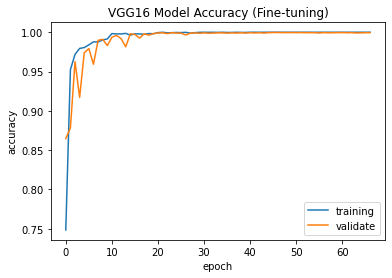

In [35]:
# Plot training and validation accuracy
plt.plot(result_vgg16_imagenet_trainable.history['accuracy'])
plt.plot(result_vgg16_imagenet_trainable.history['val_accuracy'])
plt.title('VGG16 Model Accuracy (Fine-tuning)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(["training","validate"])

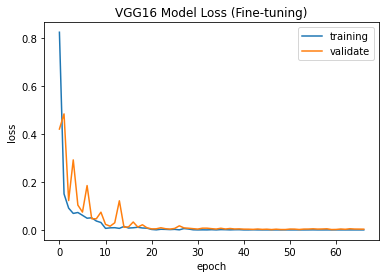

In [36]:
# Plot training and validation loss
plt.plot(result_vgg16_imagenet_trainable.history['loss'])
plt.plot(result_vgg16_imagenet_trainable.history['val_loss'])
plt.title('VGG16 Model Loss (Fine-tuning)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(["training","validate"])

## 9. Evaluate Model and Assess Misclassififcations

395/395 [==============================] - 4s 10ms/step - loss: 0.1427 - accuracy: 0.9830
215


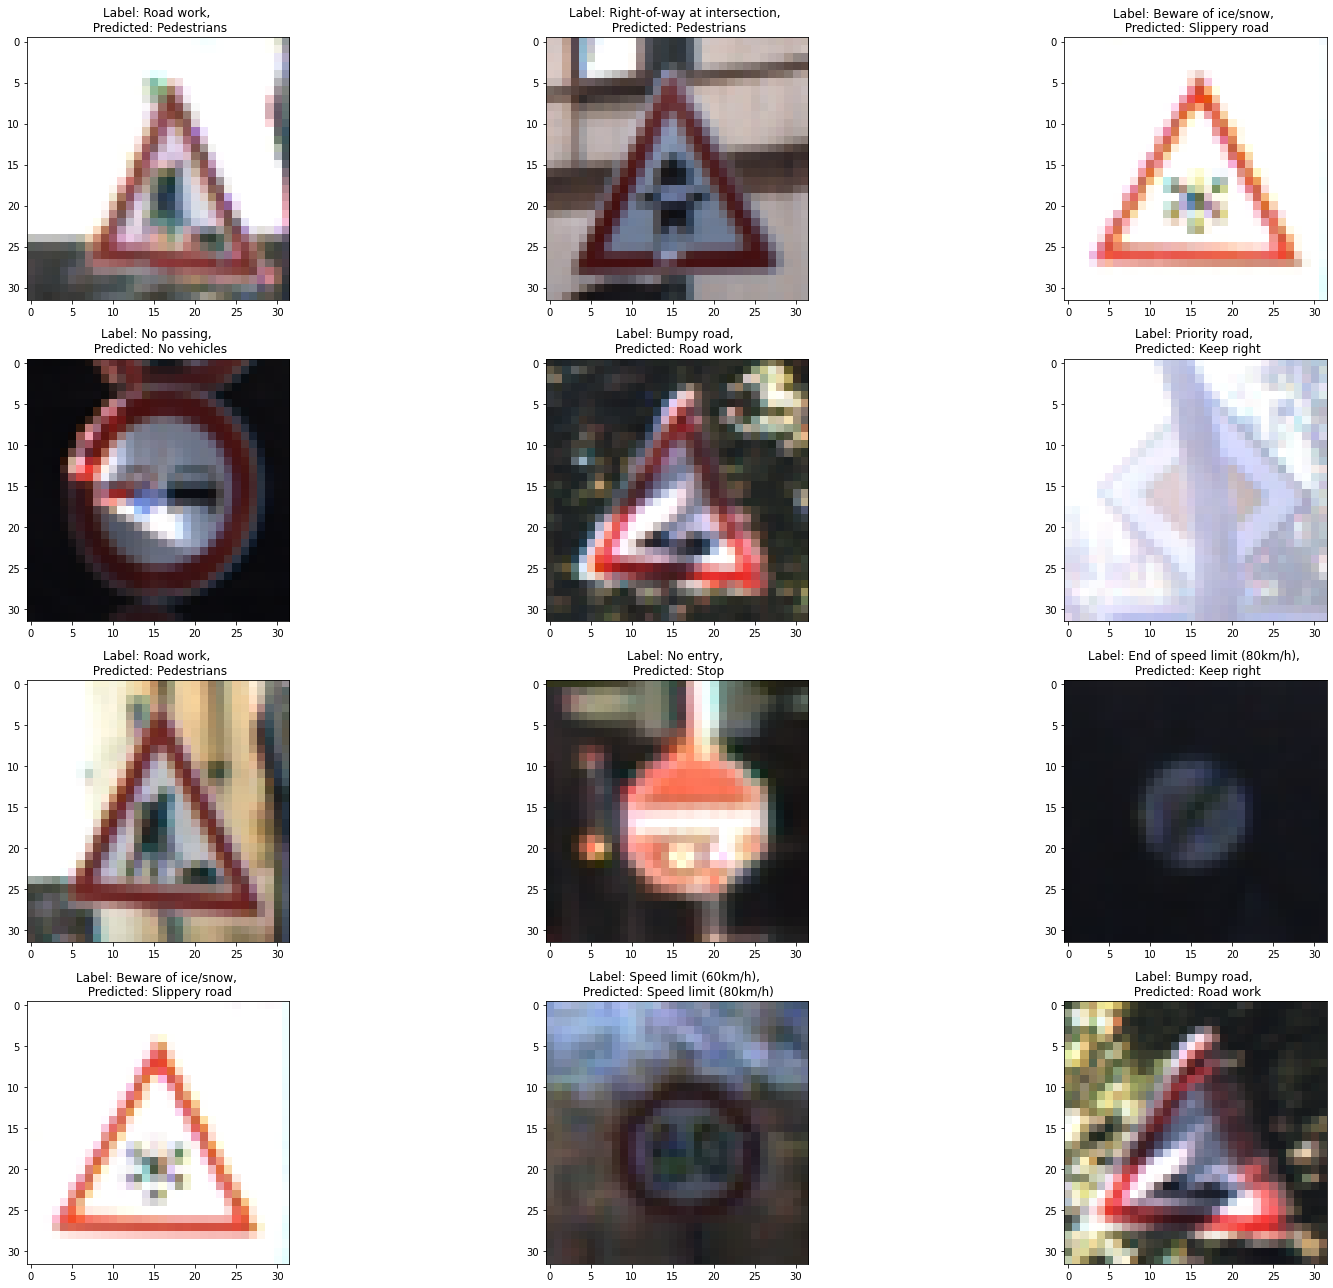

In [72]:
# Load best weights
model_vgg16_imagenet_trainable.load_weights(model_name)
X_test_norm_keras = tf.keras.applications.vgg16.preprocess_input(X_test_norm)
model_metrics = model_vgg16_imagenet_trainable.evaluate(X_test_norm_keras, Y_test_oh)

Ypred = model_vgg16_imagenet_trainable.predict(X_test_norm_keras).argmax(axis = 1)
wrong_indexes = np.where(Ypred != Y_test_ori)[0]
print(wrong_indexes.size)

# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 12, replace = False)
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(4,3,ii+1)
    plt.imshow(X_test_ori[wrong_indexes[jj]], cmap = "gray")
    plt.title("Label: %s, \n Predicted: %s" %(classes[Y_test_ori[wrong_indexes[jj]]],classes[Ypred[wrong_indexes[jj]]]))
plt.tight_layout()
plt.show()

In [76]:
Y_test_pred = model_vgg16_imagenet_trainable.predict(X_test_norm_keras)

In [77]:
matrix = tf.math.confusion_matrix(Y_test_oh.argmax(axis=1), Y_test_pred.argmax(axis=1))

In [78]:
con_mat = matrix.numpy()

classes_names = []
for key,value in classes.items():
  classes_names.append(value)
  
con_mat_df = pd.DataFrame(con_mat, index=classes_names, columns=classes_names)

print(metrics.classification_report(Y_test_ori, Ypred, digits=3, target_names=classes_names))

                               precision    recall  f1-score   support

         Speed limit (20km/h)      1.000     1.000     1.000        60
         Speed limit (30km/h)      0.989     1.000     0.994       720
         Speed limit (50km/h)      0.993     0.993     0.993       750
         Speed limit (60km/h)      1.000     0.976     0.988       450
         Speed limit (70km/h)      0.997     0.988     0.992       660
         Speed limit (80km/h)      0.980     0.997     0.988       630
  End of speed limit (80km/h)      1.000     0.953     0.976       150
        Speed limit (100km/h)      0.996     0.996     0.996       450
        Speed limit (120km/h)      0.993     0.996     0.994       450
                   No passing      1.000     0.981     0.991       480
 No passing veh over 3.5 tons      1.000     0.997     0.998       660
 Right-of-way at intersection      0.983     0.938     0.960       420
                Priority road      0.999     0.996     0.997       690
     

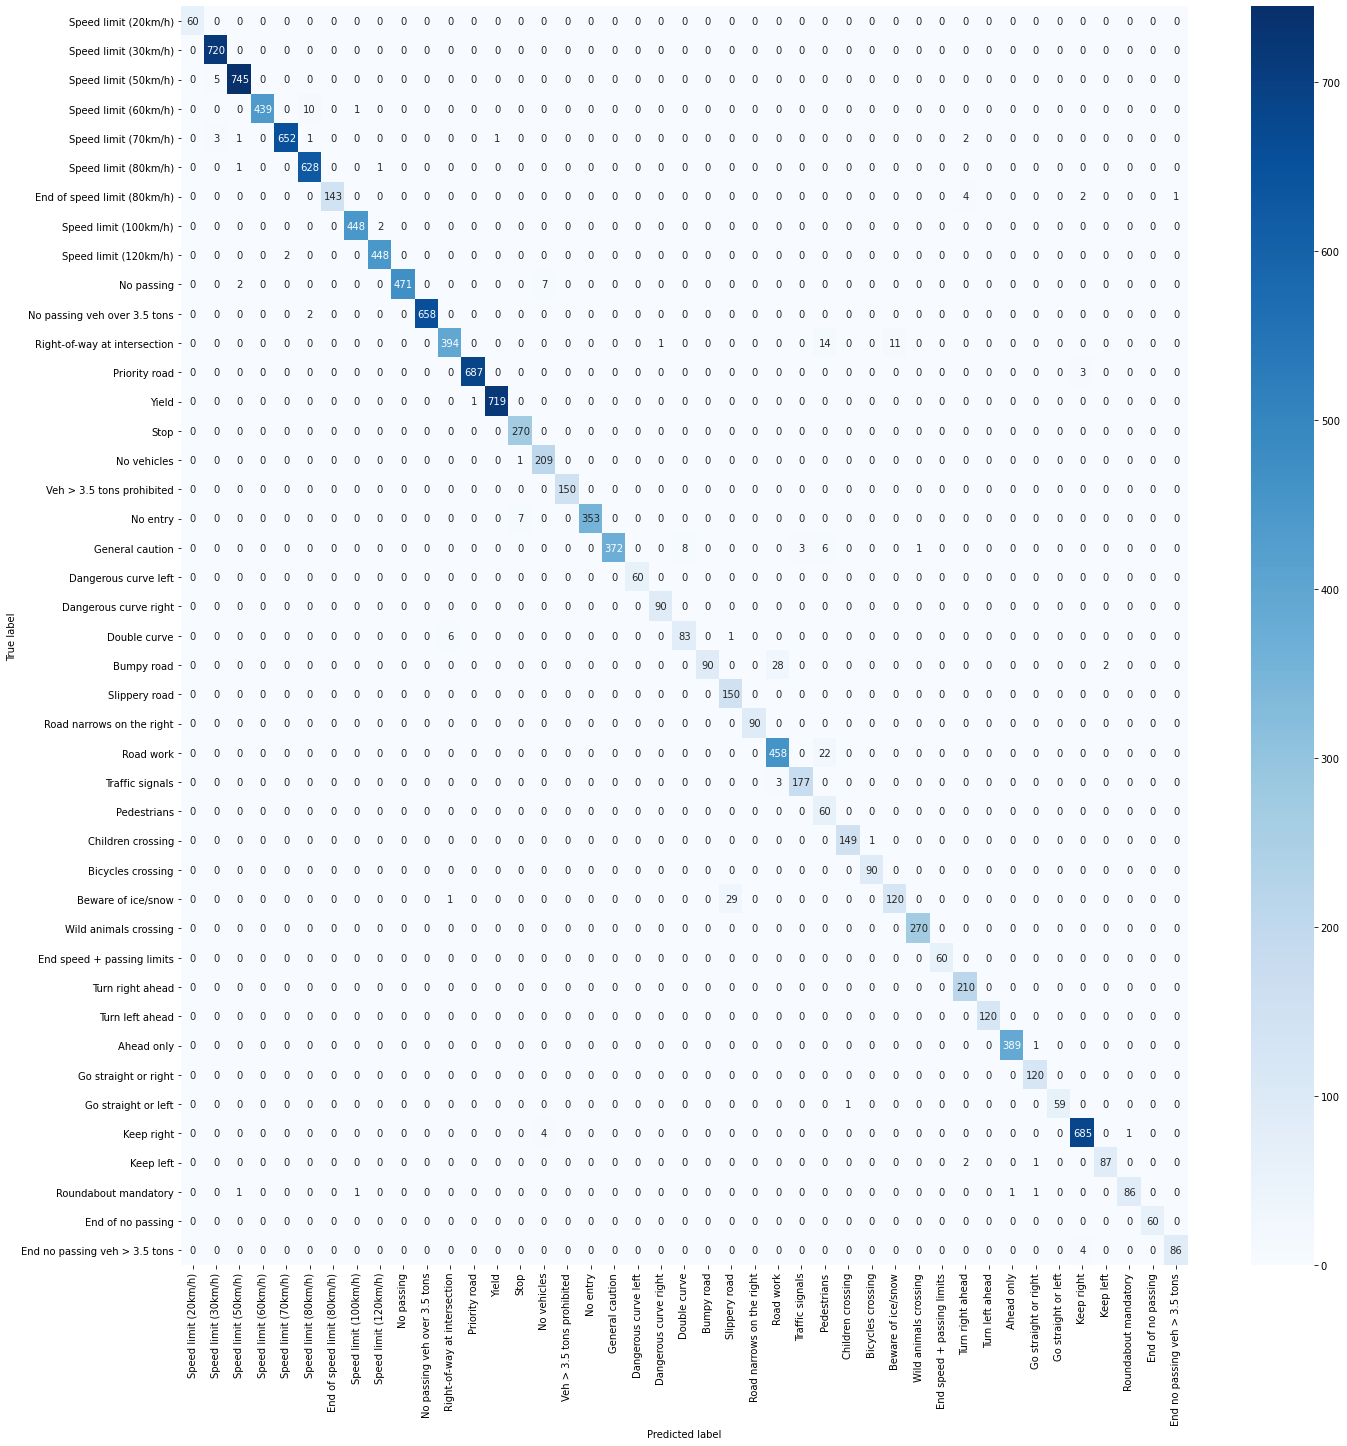

In [79]:
figure = plt.figure(figsize=(20, 20))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues, fmt='g')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()